<a href="https://colab.research.google.com/github/paulsubarna/BLIP/blob/main/DGM_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial 2: Mixture Models: Mixture of Gaussians

In this tutorial, we will learn about Mixture of Gaussians, one of the simplest, yet powerful generative models. This family of generative models takes into consideration a combination of several Gaussian distributions to represent more complex, multimodal distributions. Each component typically represents individual clusters in the data. We train our first MoG model and use them to generate new samples

### 🔧 Setup and imports



In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_digits
from sklearn import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as tt

## Implement a mixture of Gaussian distribution

- Consider three normal distributions with distinct components $(μ, σ, w)$
- Plot the normal distributions and compute the mixture of the distribution

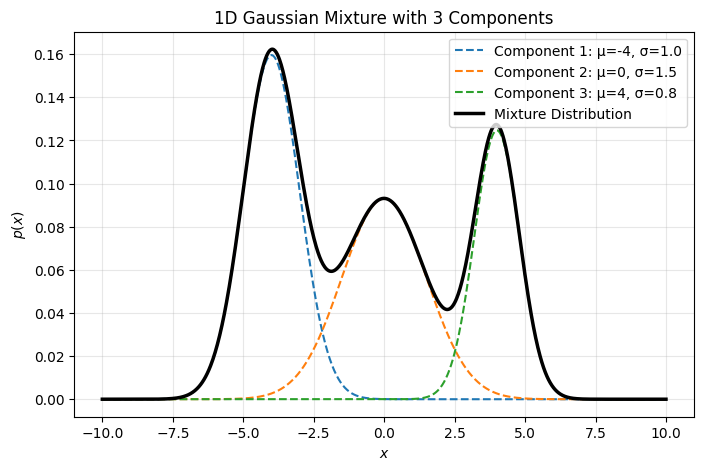

In [1]:
# Plot 1D Gaussian Mixture (multiple components)




## Dataset: Digits

In this example,the dataset we will use is much simpler than MNIST! We use a scipy dataset called Digits. It consists of ~1500 images of size 8x8, and each pixel can take values in $\{0, 1, \ldots, 16\}$.

### 📦 Dataset wrapper: `Digits`

The goal of this cell is to wrap the **scikit‑learn Digits dataset** into a small PyTorch `Dataset` class so that we can later feed it to a `DataLoader`.

**What the class does:**
1. Loads the digits data from `sklearn`.
2. Splits it into **train / validation / test** subsets.
3. Optionally applies a transform (normalisation, noise, …).
4. Returns items as **floating point tensors** of shape $(64,)$ — because each digit image is $8 \times 8 = 64$ pixels.

Mathematically, each observation is
$$
\mathbf{x}^{(i)} \in \mathbb{R}^{64}, \quad i = 1, \dots, N.
$$

We will later model the distribution of these $\mathbf{x}$’s with a mixture of Gaussians.


In [4]:
class Digits(Dataset):
    """Scikit-Learn Digits dataset."""

    def __init__(self, mode='train', transforms=None):
        digits = load_digits()
        if mode == 'train':
            self.data = digits.data[:1000].astype(np.float32)
        elif mode == 'val':
            self.data = digits.data[1000:1350].astype(np.float32)
        else:
            self.data = digits.data[1350:].astype(np.float32)

        self.transforms = transforms

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transforms:
            sample = self.transforms(sample)
        return sample

---
💡 **Task: TO-DO**


1. Instantiate the training split of the `Digits` dataset.  
2. Print the **shape** of the first item and **min/max** values.  
3. Visualise the first 4 digits as $8\times 8$ images.




Shape of one sample: (64,)
Min / Max: 0.0 15.0


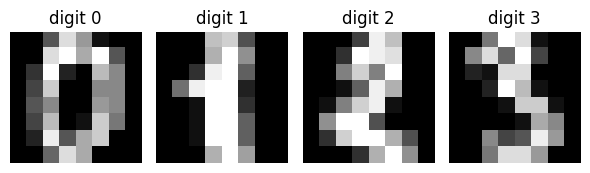

In [5]:
## TODO

## Mixture Models


### 🧠 Defining the Mixture of Gaussians model (`MoG`)

This cell defines our **probabilistic model**:
$$
p(\mathbf{x}) = \sum_{k=1}^K \pi_k \, \mathcal{N}(\mathbf{x} \mid \boldsymbol\mu_k, \operatorname{diag}(\boldsymbol\sigma_k^2)),
$$
where

- $K$ is the **number of mixture components**,
- $\pi_k$ are the **mixing coefficients** (non‑negative and $\sum_k \pi_k = 1$),
- $\boldsymbol\mu_k \in \mathbb{R}^D$ are the **means**,
- $\boldsymbol\sigma_k^2 \in \mathbb{R}^D$ are the **(diagonal) variances**.

In code we parameterise:
- the means as a learnable tensor `mu` of shape `(1, K, D)`,
- the (log) variances as `log_var` so that variances stay positive,
- the mixture weights as unnormalised logits `w`, which we later turn into a probability simplex using **softmax**.

This class will also contain helper methods such as:
- `log_prob(x, reduction=...)` → to compute $\log p(\mathbf{x})$,
- possibly `sample(...)` → to generate digits from the learned mixture.




In [6]:
class MoG(nn.Module):
    def __init__(self, D, K, uniform=False):
        super(MoG, self).__init__()

        # hyperparams
        self.uniform = uniform
        self.D = D  # the dimensionality of the input
        self.K = K  # the number of components

        # params
        self.mu =
        self.log_var =

        if self.uniform:
            self.w =
            self.w.requires_grad = False
        else:
            self.w = nn.Parameter()

        # other
        self.PI = torch.from_numpy(np.asarray(np.pi))

    def log_diag_normal(self, x, mu, log_var, reduction='sum', dim=1):
        log_p =
        return log_p

    def forward(self, x, reduction='mean'):
        # calculate components


    def sample(self, batch_size=64):
        # init an empty tensor
        x_sample = torch.empty(batch_size, self.D)

        # sample components


        return x_sample

    def log_prob(self, x, reduction='mean'):
        with torch.no_grad():
            # calculate components


---
💡 **TO-DO — understanding the MoG forward pass**

**Task:**  
1. Create a dummy batch `x` of size `(5, 64)` sampled from `torch.randn`.  
2. Pass it through `model.log_prob(x)` to get the log-likelihood.  
3. Check that the output has shape `(5,)` or a single scalar depending on `reduction`.  
4. Change the number of components `K` and observe how the parameters change.




In [10]:
# TODO

log p(x) shape: torch.Size([])
mixture means shape: torch.Size([1, 3, 64])
mixture log-var shape: torch.Size([1, 3, 64])
mixture logits shape: torch.Size([1, 3])


## 🧪 Evaluation, sampling, and visualisation

This cell defines an **evaluation routine** that we will call **after or during training**.

What it does:
1. **Loads** the best model from disk (the one with the lowest validation loss).
2. **Switches to evaluation mode** (`model.eval()`).
3. Loops over the **test set** and computes the **average negative log‑likelihood (NLL)**:
   $$
   \text{NLL} = - \frac{1}{N} \sum_{i=1}^N \log p_\theta(\mathbf{x}^{(i)}),
   $$
   which is the standard metric for generative models.
4. Optionally **produces plots / samples / curve of losses** to inspect whether the mixture learned interpretable components.
5. It also has small helpers to **visualise the means** as $8 \times 8$ images with their associated mixture weights.



In [ ]:
def evaluation(test_loader, name=None, model_best=None, epoch=None):
    # EVALUATION


    return loss


def samples_real(name, test_loader):
    # REAL-------
    num_x = 4
    num_y = 4
    x = next(iter(test_loader)).detach().numpy()

    fig, ax = plt.subplots(num_x, num_y)
    for i, ax in enumerate(ax.flatten()):
        plottable_image = np.reshape(x[i], (8, 8))
        ax.imshow(plottable_image, cmap='gray')
        ax.axis('off')

    plt.savefig(name+'_real_images.pdf', bbox_inches='tight')
    plt.close()


def samples_generated(name, data_loader, extra_name=''):
    with torch.no_grad():
        # GENERATIONS-------


def plot_curve(name, nll_val):
    plt.plot(np.arange(len(nll_val)), nll_val, linewidth='3')
    plt.xlabel('epochs')
    plt.ylabel('nll')
    plt.savefig(name + '_nll_val_curve.pdf', bbox_inches='tight')
    plt.close()

def means_save(name, extra_name='', num_x = 4, num_y = 4):
    with torch.no_grad():
        # GENERATIONS-------


---
💡 **TO-DO — computing NLL on a subset**

Sometimes you don’t want to run evaluation on the *whole* test set.

**Task:**  
1. Take only the **first batch** from `test_loader`.  
2. Load the best model from disk.  
3. Compute the NLL on that batch only.  
4. Compare it to the full-test NLL you get from `evaluation(...)`.




In [ ]:
## TODO

### 🚂 Training loop for the GMM

This cell defines the **training procedure**. Even though classical GMMs are often trained with **EM**, here we show that we can **directly optimise the log‑likelihood with gradient descent**.

**Objective:** maximise
$$
\mathcal{L}(\theta) = \sum_{i=1}^N \log \Bigg( \sum_{k=1}^K \pi_k \, \mathcal{N}(\mathbf{x}^{(i)} \mid \boldsymbol\mu_k, \operatorname{diag}(\boldsymbol\sigma_k^2)) \Bigg),
$$
or, equivalently, **minimise** the negative of this value (NLL).

**What the function does:**
1. Loops over epochs.
2. For every mini‑batch, calls the model to get the **NLL**, backpropagates, and does an **optimizer step**.
3. After each epoch, evaluates on the **validation set** to implement **early stopping**.
4. Saves the **best‑performing model** to disk.
5. Optionally generates samples to monitor training.



In [ ]:
def training(name, max_patience, num_epochs, model, optimizer, training_loader, val_loader):
    nll_val = []
    best_nll = 1000.
    patience = 0

    # Main loop
    for e in range(num_epochs):
        # TRAINING
        model.train()
        for indx_batch, batch in enumerate(training_loader):
            loss = model.forward(batch)

            optimizer.zero_grad()
            loss.backward(retain_graph=True)
            optimizer.step()

        # Validation
        loss_val = evaluation(val_loader, model_best=model, epoch=e)
        nll_val.append(loss_val)  # save for plotting

        if e == 0:
            print('saved!')
            torch.save(model, name + '.model')
            best_nll = loss_val
        else:
            if loss_val < best_nll:
                print('saved!')
                torch.save(model, name + '.model')
                best_nll = loss_val
                patience = 0
            else:
                patience = patience + 1

        samples_generated(name, val_loader, extra_name="_epoch_" + str(e))

        if patience > max_patience:
            break

    nll_val = np.asarray(nll_val)

    return nll_val

## Experiments

### 🧼 Initialize datasets: Data transform

Before feeding images to the model, we apply a small **pre‑processing transform**:

- rescale the raw digits (0–16) to roughly **[-1, 1]**,
- optionally add a **small Gaussian noise** to make the density estimation less degenerate.

This corresponds to the common practice of slightly **de‑quantising** discrete images when using continuous density models.


In [ ]:
transforms = tt.Lambda(lambda x: (x/17.) + (np.random.randn(*x.shape)/136.))  # changing to [-1, 1] and adding small Gaussian noise

---
💡 **TO-DO — effect of de-quantisation**

Our transform adds a *small* Gaussian noise.

**Task:**  
1. Remove the noise term from the transform.  
2. Recreate the dataset and visualise again.  
3. Discuss: why might a continuous density model prefer slightly noisy inputs?



In [ ]:
## TODO

### 📥 Building the data loaders

Here we actually **instantiate** the `Digits` dataset three times:
- **training set** (used to update the parameters),
- **validation set** (used for early stopping),
- **test set** (used only at the very end).

Then we wrap them into **PyTorch `DataLoader`s** to get batches.



In [ ]:
train_data = Digits(mode='train', transforms=transforms)
val_data = Digits(mode='val', transforms=transforms)
test_data = Digits(mode='test', transforms=transforms)

training_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

**Hyperparameters**

### ⚙️ Hyperparameters for the Mixture of Gaussians

This cell lists the **key hyperparameters**:

- $D = 64$ → dimensionality of the digits,
- $K = 25$ → number of mixture components (i.e. how many Gaussians we allow),
- learning rate, number of epochs, and early‑stopping patience.




In [ ]:
D = 64   # input dimension

K = 25  # the number of neurons in scale (s) and translation (t) nets

lr = 1e-3 # learning rate
num_epochs = 1000 # max. number of epochs
max_patience = 20 # an early stopping is used, if training doesn't improve for longer than 20 epochs, it is stopped

**Creating a folder for results**

### 🗂️ Creating a results directory

We keep all artefacts of a run (model checkpoints, generated samples, learning curves) inside a folder:

- name is constructed from the model type and $K$,
- folder is created if it doesn’t exist.

This makes runs reproducible and easy to inspect.


In [ ]:
name = 'mog' + '_' + str(K)
if not (os.path.exists('results/')):
    os.mkdir(result_dir)
result_dir = 'results/' + name + '/'
if not (os.path.exists(result_dir)):
    os.mkdir(result_dir)

**Initializing the model**

### 🏗️ Model instantiation

Here we actually **create** the Mixture of Gaussians model with the chosen dimensionality `D` and number of components `K`:

```python
model = MoG(D=D, K=K, uniform=True)
```

The flag `uniform=True` initialises the mixture weights so that all components start with
$$
\pi_k = \frac{1}{K},
$$
which is a sensible default for teaching.


In [ ]:
# Eventually, we initialize the full model
model = MoG(D=D, K=K, uniform=True)

---
💡 **TO-DO — non-uniform initialisation**

Right now we initialise the mixture weights to be uniform.

**Task:**  
1. Re-instantiate the model with `uniform=False`.  
2. Inspect the initial logits / mixture weights.  
3. Explain to students why bad initialisation can slow training.



In [ ]:
## TODO

**Optimizer - here we use Adamax**

### 🛠️ Choosing an optimizer

We use **AdamW** here, which is a variant of Adam with decoupled weight decay.  

If you want to **experiment**, try:
- SGD with momentum,
- different learning rates,
- freezing some parameters.


In [ ]:
# OPTIMIZER
# optimizer = torch.optim.SGD([p for p in model.parameters() if p.requires_grad == True], lr=lr, momentum=0.1, weight_decay=1.e-4)
optimizer = torch.optim.AdamW([p for p in model.parameters() if p.requires_grad == True], lr=lr)

---
💡 **TO-DO — different optimizers**

**Task:**  
1. Replace AdamW with SGD + momentum.  
2. Train for 10–20 epochs.  
3. Compare the validation NLL curves.



In [1]:
# TODO

### ▶️ Actual training

This cell **launches** the training procedure defined earlier:

1. calls `training(...)` with the model, optimizer and data loaders,
2. stores the validation NLL values,
3. lets early stopping stop the run if validation does not improve.

After this cell finishes, you should have a **trained GMM** saved on disk.


In [ ]:
# Training procedure
nll_val = training(name=result_dir + name, max_patience=max_patience, num_epochs=num_epochs, model=model, optimizer=optimizer,
                       training_loader=training_loader, val_loader=val_loader)

---
💡 **TO-DO — inspect learned components**

**Task:**  
1. After training, load the best model.  
2. Extract `mu` and visualise the first 16 means as $8\times 8$ images.  
3. Next to each, print the corresponding $\pi_k$.



In [2]:
# TO-DO

### ✅ Final evaluation and qualitative inspection

To conclude, we:
1. run the evaluation on the **test set**,
2. **save** the test NLL,
3. **visualise** real vs. generated samples,
4. **plot** the training curve,
5. **visualise** the learned component means (as $8\times 8$ images) together with their learned mixture weights.



In [ ]:
test_loss = evaluation(name=result_dir + name, test_loader=test_loader)
f = open(result_dir + name + '_test_loss.txt', "w")
f.write(str(test_loss))
f.close()

samples_real(result_dir + name, test_loader)
samples_generated(result_dir + name, test_loader, extra_name='FINAL')

means_save(result_dir + name, extra_name='_'+str(K), num_x=5, num_y=5)

plot_curve(result_dir + name, nll_val)

---
💡 **TO-DO — Effect of $K$ on Model Generalizability**

**Task:**  
1. Change `K` to a **very small** value (e.g. 3) or to a **larger** value (e.g. 50)
2. Train briefly in both cases (few epochs).  
3. Compare the validation NLLs.




In [12]:
## TODO

### 🚨 Detecting Out-of-Distribution (OOD) Samples

One useful property of generative models like GMMs is that they assign a **likelihood score** to every input.
By comparing these likelihoods, we can identify *unusual* or *out-of-distribution* (OOD) data points.

#### Idea:
- Fit the model to a dataset
- Compute $\log p_\theta(x)$ for real test samples (Digits).
- Compute $\log p_\theta(x)$ for fake / random samples.
- Compare the two distributions.

If our model is well-trained, OOD samples should have **significantly lower likelihoods**.


In [ ]:
## TODO

** CONCLUSION **

In this notebook, we have learned to train our first generative model MoGs. In the next tutorials, we will delve into more sophisticated and powerful approaches.